In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import LSTM,Dense,Dropout
import os

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\surface\anaconda3\MyCSV\BTC-USD-2022.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
1,2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2,2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
3,2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
4,2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


In [3]:
df = df.set_index("Date")[['Close']]
df = df.set_index(pd.to_datetime(df.index))

df = df[::-1]
df.head()

,Close
Date,
2022-01-03,47316.046875
2022-01-02,47345.218750
2022-01-01,47686.812500
2021-12-31,46306.445313
2021-12-30,47178.125000


,Close
Date,
2022-01-03,47316.046875
2022-01-02,47345.218750
2022-01-01,47686.812500
2021-12-31,46306.445313
2021-12-30,47178.125000


In [4]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns , index = df.index)
df.tail()

,Close
Date,
2017-11-13,0.051651
2017-11-12,0.042178
2017-11-11,0.048513
2017-11-10,0.052563
2017-11-09,0.060731


,Close
Date,
2017-11-13,0.051651
2017-11-12,0.042178
2017-11-11,0.048513
2017-11-10,0.052563
2017-11-09,0.060731


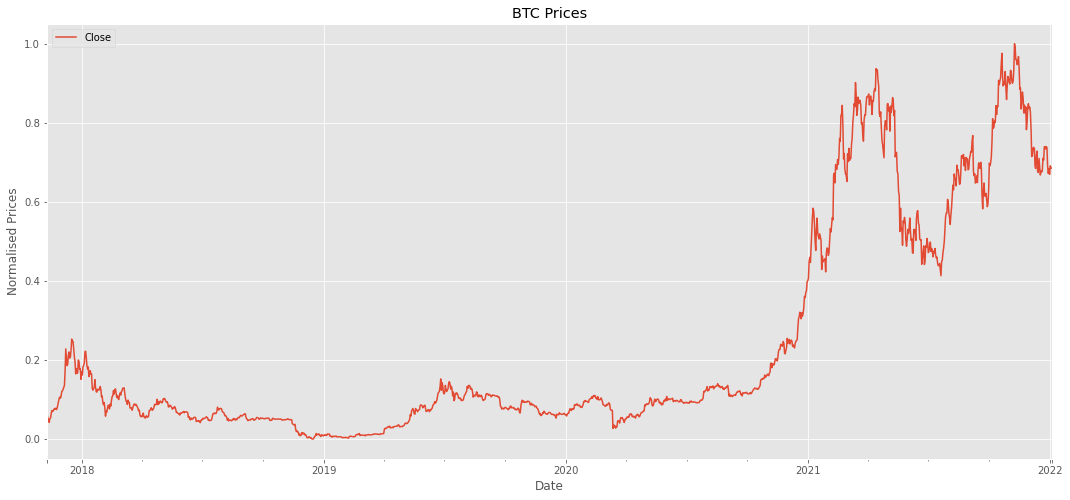

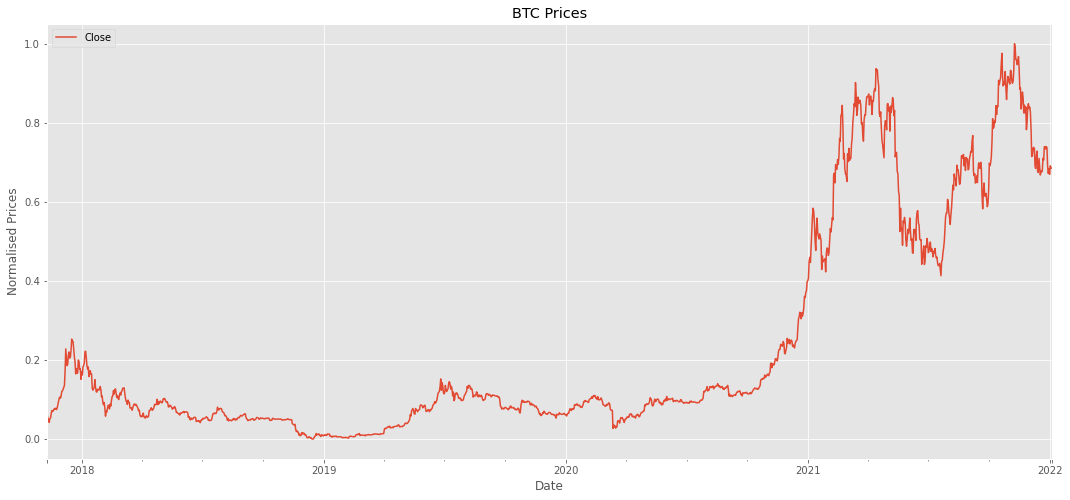

In [5]:
df.plot(figsize=(18,8))
plt.title('BTC Prices')
plt.ylabel('Normalised Prices')
plt.show()

In [6]:
def split_sequences(seq, n_steps_in , n_steps_out):  # X = inputs / Y = results
    X,y = [],[]
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        
        if out_end > len(seq):
            break
            
        seq_x ,seq_y = seq[i:end] , seq[end:out_end]
    
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X) , np.array(y)

In [7]:
def visualize_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('loss')
    plt.xlabel('Epoches')
    plt.ylabel('loss')
    plt.show()
    
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()

In [8]:
n_per_in = 30
n_per_out = 10
n_features = 1

X,y = split_sequences(list(df.Close), n_per_in ,n_per_out )

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)

(1478, 30)
(1478, 30, 1)
(1478, 30)
(1478, 30, 1)


In [9]:
model = Sequential()
model.add(LSTM(60 , activation ='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(20 , activation ='softsign', return_sequences=True))
model.add(LSTM(20 , activation ='softsign', return_sequences=True))
model.add(LSTM(20 , activation ='softsign', return_sequences=True))
model.add(LSTM(20 , activation ='softsign', return_sequences=True))
model.add(LSTM(20 , activation ='softsign', return_sequences=True))
model.add(LSTM(20 , activation ='softsign'))   #hidden layer
model.add(Dropout(0.2))
model.add(Dense(n_per_out))

model.summary()

Model: "sequential"
Model: "sequential"
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 60)            14880     
 lstm (LSTM)                 (None, 30, 60)            14880     
                                                                 
                                                                 
 lstm_1 (LSTM)               (None, 30, 20)            6480      
 lstm_1 (LSTM)               (None, 30, 20)            6480      
                                                                 
                                                                 
 lstm_2 (LSTM)               (None, 30, 20)            3280      
 lstm_2 (LSTM)               (None, 30, 20)            3280      
                                    

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])  #MSE is a numerical feature

In [ ]:
if (not os.path.exists(r'C:\Users\surface\anaconda3\myLSTMNN\prediction_BTC1.h5')) :
    res = model.fit(X,y, epochs=100 ,batch_size=128, validation_split=0.1)
    model.save(r'C:\Users\surface\anaconda3\myLSTMNN\prediction_BTC1.h5')

Epoch 1/100
Epoch 1/100


In [ ]:
model_res = load_model(r'C:\Users\surface\anaconda3\myLSTMNN\10prediction_BTC.h5')

In [ ]:
loss, acc = model_res.evaluate(X, y, verbose=0)
print( 'loss: %f, acc: %f' % (loss, acc*100))

In [ ]:
#visualize_results(model_res)


In [ ]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat =scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual =scaler.inverse_transform(y[-1].reshape(-1,1))

print('predicted' , yhat)
plt.plot(yhat , label='predicted')

print('actual', actual.tolist())

plt.plot(actual.tolist(), label='actual')

plt.title('Predicted vs Actual')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat , index= pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

print(preds)

periods = 10

actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)) , index = df.Close.tail(periods).index, columns=df.columns).append(preds.head(1))

plt.figure(figsize=(12,4))
plt.plot(actual , label = "actual price")
plt.plot(preds , label="predicted price")


plt.ylabel('price')
plt.xlabel('Date')

plt.legend()
plt.show()